In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
# 데이터 불러오기
df = pd.read_csv("Travel details dataset.csv")

In [4]:
# 데이터 구조 파악하기
print(df.head())
print('-'*80)
print(df.info())

   Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK   5/1/2023   5/8/2023              7.0   
1        2  Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2        3   Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3        4     New York, USA  8/15/2023  8/29/2023             14.0   
4        5      Tokyo, Japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               1200              Flight   
1             Resort

In [5]:
# 결측치 확인하기
print("[Missing Values]\n")
print(df.isnull().sum())

[Missing Values]

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64


In [6]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)    # 총 3개 행에 결측값 존재 확인 -> 삭제

     Trip ID  Destination Start date   End date  Duration (days)  \
71        72          NaN        NaN        NaN              NaN   
82        83  Rome, Italy  4/15/2025  4/22/2025              7.0   
127      128          NaN        NaN        NaN              NaN   

    Traveler name  Traveler age Traveler gender Traveler nationality  \
71            NaN           NaN             NaN                  NaN   
82      James Kim          41.0            Male             American   
127           NaN           NaN             NaN                  NaN   

    Accommodation type Accommodation cost Transportation type  \
71                 NaN                NaN                 NaN   
82               Hotel                100                 NaN   
127                NaN                NaN                 NaN   

    Transportation cost  
71                  NaN  
82                  NaN  
127                 NaN  


In [7]:
# 결측치 삭제하기
df.dropna(inplace=True)
# 인덱스 재설정
df = df.reset_index(drop=True)
df = df.drop('Trip ID',axis=1)
df

,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
132,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
133,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
134,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [8]:
df

,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
132,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
133,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
134,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [9]:
import re
df['Accommodation cost'] = df['Accommodation cost'].apply(lambda x:re.sub('[^0-9]','',x))
df['Transportation cost'] = df['Transportation cost'].apply(lambda x:re.sub('[^0-9]','',x))

In [10]:
df[['Accommodation cost','Transportation cost']] = df[['Accommodation cost','Transportation cost']].astype(int)

In [11]:
df[['Start date','End date']] = df[['Start date','End date']].apply(pd.to_datetime)

In [12]:
# 1. 'Transportation cost' & 'Accommodation cost' 칼럼이 object -> int 로 바뀜
# 2. 'Start date' & 'End date' 칼럼이 object -> datetime 으로 바뀜
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Destination           136 non-null    object        
 1   Start date            136 non-null    datetime64[ns]
 2   End date              136 non-null    datetime64[ns]
 3   Duration (days)       136 non-null    float64       
 4   Traveler name         136 non-null    object        
 5   Traveler age          136 non-null    float64       
 6   Traveler gender       136 non-null    object        
 7   Traveler nationality  136 non-null    object        
 8   Accommodation type    136 non-null    object        
 9   Accommodation cost    136 non-null    int64         
 10  Transportation type   136 non-null    object        
 11  Transportation cost   136 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 12.9+ KB


In [13]:
# 수치형 vs 범주형 데이터 분리
numerical = df.select_dtypes(include=['int64','float64']).columns
categorical = df.select_dtypes(include=['object']).columns

print("[Numerical columns]")
print(numerical)
print("\n[Categorical columns]")
print(categorical)

[Numerical columns]
Index(['Duration (days)', 'Traveler age', 'Accommodation cost',
       'Transportation cost'],
      dtype='object')

[Categorical columns]
Index(['Destination', 'Traveler name', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Transportation type'],
      dtype='object')


In [14]:
# 수치형 변수의 기초 통계
print("[Descriptive Statistics for Numerical Data]\n")
print(df[numerical].describe())

[Descriptive Statistics for Numerical Data]

       Duration (days)  Traveler age  Accommodation cost  Transportation cost
count       136.000000    136.000000          136.000000           136.000000
mean          7.610294     33.117647         1253.529412           645.183824
std           1.606343      7.139933         1338.644162           584.476153
min           5.000000     20.000000          150.000000            20.000000
25%           7.000000     28.000000          600.000000           200.000000
50%           7.000000     31.000000          900.000000           550.000000
75%           8.000000     37.250000         1200.000000           800.000000
max          14.000000     60.000000         8000.000000          3000.000000


In [15]:
# 범주형 변수의 유니크 값 + 빈도수
print("[Categorical Uniques]")
for col in categorical:
    print(f"{col} - Unique Values\n", df[col].value_counts())
    print('-'*50)

[Categorical Uniques]
Destination - Unique Values
 Destination
Paris                          7
Bali                           7
Tokyo, Japan                   7
Paris, France                  7
Tokyo                          5
Sydney                         5
Rome                           5
New York                       5
Bali, Indonesia                5
Rio de Janeiro, Brazil         4
Bangkok                        4
Cancun, Mexico                 4
Barcelona, Spain               4
London                         4
Rome, Italy                    3
Bangkok, Thailand              3
Sydney, Aus                    3
London, UK                     3
New York, USA                  3
Sydney, Australia              3
Vancouver, Canada              2
New York City, USA             2
Barcelona                      2
Cape Town                      2
Dubai                          2
Amsterdam, Netherlands         2
Bangkok, Thai                  1
Seoul, South Korea             1
Los Angeles, 

In [16]:
# 왜도와 첨도 확인
print('[Skewness]')
print(df[numerical].skew())
print('\n[Kurtosis]')
print(df[numerical].kurt())

[Skewness]
Duration (days)        0.972743
Traveler age           0.995364
Accommodation cost     3.186523
Transportation cost    2.031164
dtype: float64

[Kurtosis]
Duration (days)         1.743256
Traveler age            0.883292
Accommodation cost     10.843264
Transportation cost     4.946601
dtype: float64


                     Duration (days)  Traveler age  Accommodation cost  \
Duration (days)             1.000000     -0.118039           -0.129948   
Traveler age               -0.118039      1.000000            0.039396   
Accommodation cost         -0.129948      0.039396            1.000000   
Transportation cost        -0.001185      0.054533            0.787319   

                     Transportation cost  
Duration (days)                -0.001185  
Traveler age                    0.054533  
Accommodation cost              0.787319  
Transportation cost             1.000000  


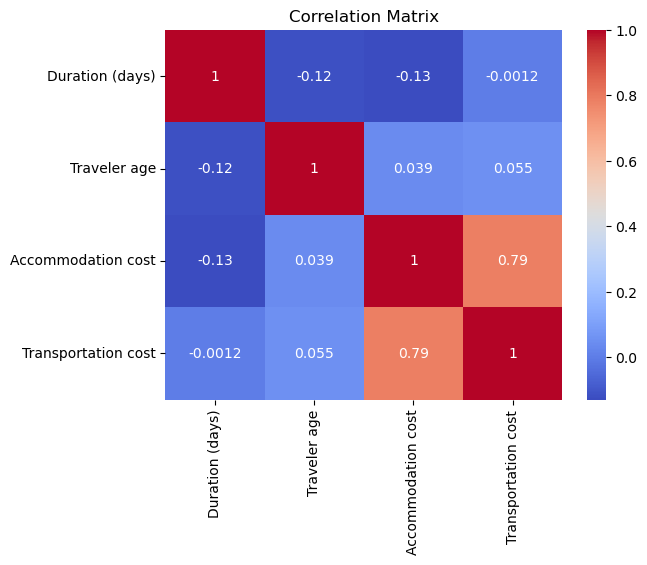

In [17]:
# 상관계수 계산하고 시각화해보기
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation_matrix = df[numerical].corr()

# 상관계수 출력
print(correlation_matrix)

# 상관계수 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df['Destination']

0                  London, UK
1            Phuket, Thailand
2             Bali, Indonesia
3               New York, USA
4                Tokyo, Japan
                ...          
131    Rio de Janeiro, Brazil
132         Vancouver, Canada
133         Bangkok, Thailand
134          Barcelona, Spain
135     Auckland, New Zealand
Name: Destination, Length: 136, dtype: object

In [19]:
# Top 5 Most visited countries 구하기

# 도착지명을 city 만 남도록 모두 통일 (예: Tokyo, Janpan --> Tokyo)
df['Destination'] = df['Destination'].apply(lambda x: x.split(',')[0])

# 값이 잘 만들어졌는지 확인
for city in df['Destination']:
    print(city)

# 집계하여 Top 5 cities 찾기
df['Destination'].value_counts().sort_values(ascending=False).head(5)    # Paris, Tokyo, Sydney, Bali, New York

London
Phuket
Bali
New York
Tokyo
Paris
Sydney
Rio de Janeiro
Amsterdam
Dubai
Cancun
Barcelona
Honolulu
Berlin
Marrakech
Edinburgh
Paris
Bali
London
Tokyo
New York
Sydney
Rome
Bangkok
Paris
Hawaii
Barcelona
Japan
Thailand
France
Australia
Brazil
Greece
Egypt
Mexico
Italy
Spain
Canada
Paris
Sydney
Tokyo
Cancun
Rio de Janeiro
London
Barcelona
New York City
Bangkok
Vancouver
Amsterdam
Paris
Tokyo
Sydney
New York
Rio de Janeiro
Bangkok
London
Barcelona
Seoul
Los Angeles
Rome
Paris
Tokyo
Cape Town
Sydney
Barcelona
Bali
Paris
New York
Bangkok
Rome
Bali
Bali
Tokyo
Cancun
Paris
Cape Town
Bali
Sydney
Bangkok
New York
Phuket
Paris
Tokyo
Bali
Sydney
New York
London
Dubai
Bangkok
Rome
Bali
Seoul
Paris
Tokyo
Sydney
London
New York
Rome
Bangkok
Cape Town
Rio de Janeiro
Bali
Amsterdam
Paris
Tokyo
New York
Bali
Sydney
London
Phuket
Rome
Santorini
Dubai
Phnom Penh
Tokyo
Paris
Sydney
Rome
Bali
Cancun
Athens
Tokyo
Sydney
Paris
Bali
Paris
Tokyo
Cape Town
Sydney
Rome
New York City
Rio de Janeiro
Vancouver


Destination
Paris       14
Tokyo       12
Sydney      12
Bali        12
New York     8
Name: count, dtype: int64

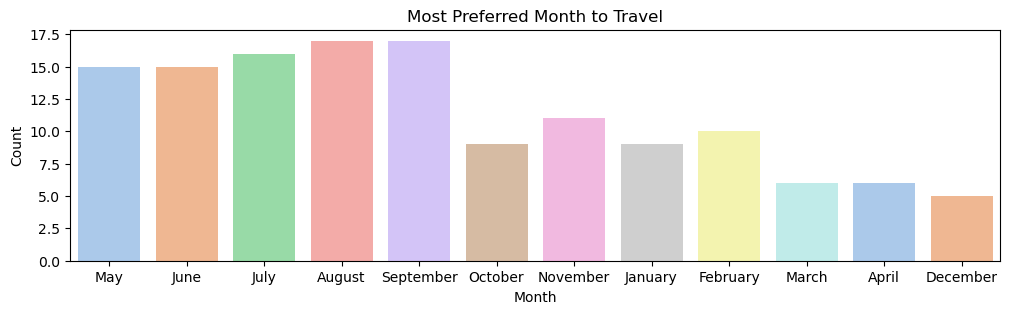

In [20]:
# Most Preferred Months to Travel

# Create 'Month' column by extracting from 'Start date'
df['Month'] = df['Start date'].dt.month_name()

plt.figure(figsize=(12,3))
sns.countplot(x='Month', hue='Month', data=df, palette='pastel', legend=False)
plt.title('Most Preferred Month to Travel')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()